# Sales Analysis

### Import Required Libraries

In [72]:
import pandas as pd
import seaborn as sn
import os
import matplotlib.pyplot as plt

### Merge data from all months into one dataframe

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months = pd.concat([all_months,current_data])
    
all_months.to_csv("sales_data.csv", index = False)


#### Read in updated dataframe

In [4]:
df = pd.read_csv("sales_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.shape

(186850, 6)

### Data Cleaning

Replace values or remove rows with invalid data. Convert data types to suit what we need. 

#### Drop rows of NaN

In [6]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
df.shape

(186305, 6)

original dataframe had 186850 rows and new dateframe has 186305 rows. 545 rows with invalid data have been removed

##### check null values

In [8]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Order ID  Product  Quantity Ordered  Price Each  Order Date  \
0          False    False             False       False       False   
2          False    False             False       False       False   
3          False    False             False       False       False   
4          False    False             False       False       False   
5          False    False             False       False       False   
...          ...      ...               ...         ...         ...   
186845     False    False             False       False       False   
186846     False    False             False       False       False   
186847     False    False             False       False       False   
186848     False    False             False       False       False   
186849     False    False             False       False       False   

        Purchase Address  
0                  False  
2                  False  
3   

no null values found

#### check if there are dupliates

In [9]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


618 rows of duplicate data have been found and notice that some rows have the heading name as an entry in the cells, which means that when merging the data, the headings from other sheets were taken as data. 
******************

##### remove duplicates

In [10]:
df.drop_duplicates(inplace = True)
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
df.shape

(185687, 6)

all duplicated data has been removed

In [12]:
df[df["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df.drop([519], axis = 0, inplace = True)
df.shape

(185686, 6)

In [14]:
df[df["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


successfully removed cells with the heading as entries
****************************************************

#### Check if columns have the correct data type

In [15]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

"Quanitity Ordered ", "Price Each" and "Order Date"columns are objects when they are suppose to be numerical values and datetime. next step is to convert these data types into numerical data types and datetime


In [16]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [17]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [18]:
df.describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


looking at this summary of the data, notice that the maximum Price Each is 1700 but the mean is 184. check if 1700 is not a typo or mistake

In [19]:
df[df['Price Each'] == 1700]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"
86,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00,"853 Cedar St, San Francisco, CA 94016"
90,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00,"373 Adams St, Boston, MA 02215"
93,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00,"657 Adams St, Portland, OR 97035"
136,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00,"121 Wilson St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186514,259041,Macbook Pro Laptop,1,1700.0,2019-09-13 23:14:00,"220 Sunset St, New York City, NY 10001"
186637,259157,Macbook Pro Laptop,1,1700.0,2019-09-12 05:01:00,"326 Forest St, Seattle, WA 98101"
186787,259299,Macbook Pro Laptop,1,1700.0,2019-09-30 23:59:00,"240 Chestnut St, Los Angeles, CA 90001"
186797,259308,Macbook Pro Laptop,1,1700.0,2019-09-26 19:16:00,"912 8th St, Boston, MA 02215"


In [20]:
df[df['Price Each'] == 1700]['Product'].unique()

array(['Macbook Pro Laptop'], dtype=object)

1700 is not a mistake or typo because it is the price of the Macbook Pro Laptop across the dataframe

This marks the end of our data cleaning process. now we start preparing our dataframe for exploration and anaylsis.

**********************************************

## Prepare Dataframe for Exploratory Analysis

in this section 'Order Date' will be split into Date and Time so it can be understand the relationship between time, day and month and sales.

a sales Column will be created which will give the total sales amount of an entry.

a Cities column will be created to see which city performs the best and worst.

#### Split 'Order Date' by Date and Time

In [21]:
df['Date'] = pd.to_datetime(df['Order Date']).dt.date
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Day'] = df['Order Date'].dt.weekday
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,Day,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,4,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,4,6,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,4,1,9


Day column has day of the week as numbers where 0 = Sunday, Saturday = 6. 

Now we will create a sales column

#### Create Sales column

a sales column will be the product(multiplication) of 2 values from "Quantity" and "Price Each"

In [22]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,Day,Hour,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,4,4,8,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,4,6,22,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,4,1,9,11.99


#### Create a City column

In [23]:
def get_city(address):
    return address.split(",")[1].strip(" ")

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,Day,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,4,4,8,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,4,6,22,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,4,1,9,11.99,Los Angeles


In [24]:
df['City'].unique()

array(['Dallas ', 'Boston ', 'Los Angeles ', 'San Francisco ', 'Seattle ',
       'Atlanta ', 'New York City ', 'Portland ', 'Austin '], dtype=object)

The dataframe has been prepared and is now ready for exploring and analysis
*************************************

####  Save clean data as csv

In [25]:
df.to_csv("Clean_Sales_Data.csv", index = False)

###### import clean sales data for exploration

In [26]:
cdf = pd.read_csv("Clean_Sales_Data.csv")
cdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,Day,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,4,4,8,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,4,6,22,99.99,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,4,4,14,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,4,1,9,11.99,Los Angeles


***

## Exploratory Data Analysis of Sales Date

In [27]:
cdf.describe()

,Order ID,Quantity Ordered,Price Each,Month,Day,Hour,Sales
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,7.058653,2.991588,14.412934,185.611936
std,51511.717183,0.443069,332.843838,3.502932,2.002009,5.423329,333.032118
min,141234.000000,1.000000,2.990000,1.000000,0.000000,0.000000,2.990000
25%,185833.250000,1.000000,11.950000,4.000000,1.000000,11.000000,11.950000
50%,230354.500000,1.000000,14.950000,7.000000,3.000000,15.000000,14.950000
75%,275028.750000,1.000000,150.000000,10.000000,5.000000,19.000000,150.000000
max,319670.000000,9.000000,1700.000000,12.000000,6.000000,23.000000,3400.000000


* Customers buy one of each item on average per order. highest quantity order is 9 items. 
* the average price of items sold is 184.52 .lowest price is 2.99 and highest is 1700
* average sales are 185.61 . highest sale is 3400

In [28]:
cdf['Order ID'].value_counts()

160873    5
296353    4
304802    4
235798    4
194253    4
         ..
158126    1
158127    1
158128    1
158129    1
259357    1
Name: Order ID, Length: 178437, dtype: int64

In [29]:
cdf[cdf["Order ID"] == 160873]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,Day,Hour,Sales,City
65929,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2019-02-10,2,6,10,700.00,San Francisco
65930,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2019-02-10,2,6,10,14.95,San Francisco
65931,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2019-02-10,2,6,10,150.00,San Francisco
65932,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2019-02-10,2,6,10,11.99,San Francisco
65933,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2019-02-10,2,6,10,600.00,San Francisco


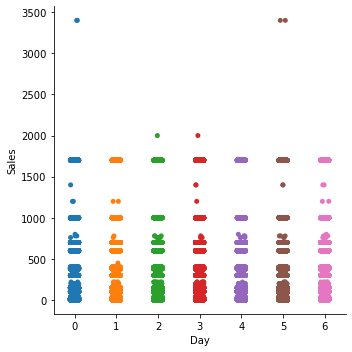

In [30]:
sn.catplot(data=cdf, x="Day", y="Sales")


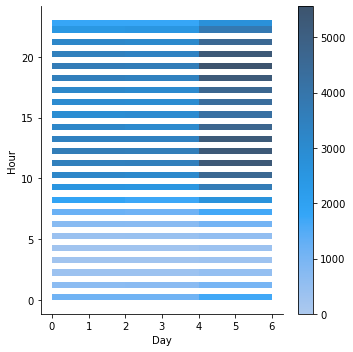

In [50]:
sn.displot(cdf, x="Day", y="Hour",binwidth=(2, .5), cbar=True)

* highest transaction rate between thursday and Sunday. 
* lowest transaction rate between 2am and 9am

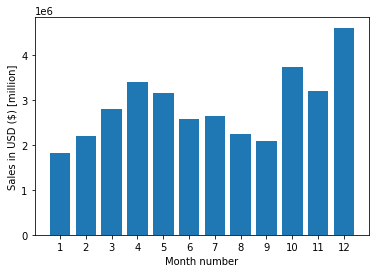

In [64]:
months = range(1,13)

plt.bar(months,cdf.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($) [million]')
plt.xlabel('Month number')
plt.show()

* December produced the highest sales,with January producing the lowest


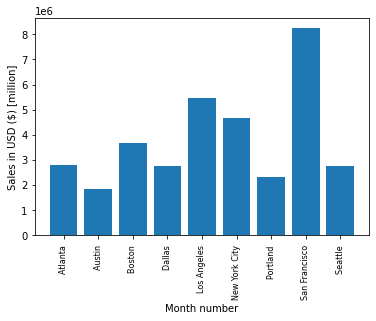

In [65]:
keys = [city for city, df in cdf.groupby(['City'])]

plt.bar(keys,cdf.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($) [million]')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

* San Francisco produced the highest sales, Austin Produced the least

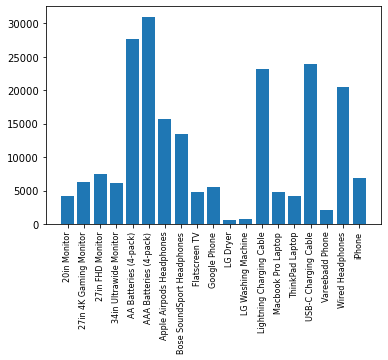

In [62]:
product_type = cdf.groupby('Product')
quantity_ordered = product_type.sum()['Quantity Ordered']

keys = [pair for pair, df in product_type]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

* AAA batteries(4-pack) sold the most and LG Dryer sold the least. 

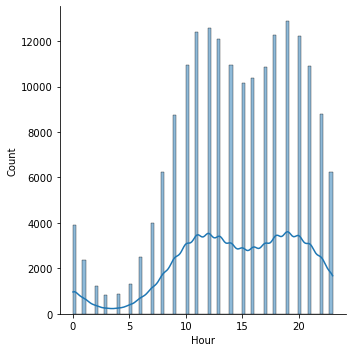

In [71]:
sn.displot(cdf, x="Hour", kde=True)

* most of the sales happen between 10am and 2pm and peak again between 5pm and 9pm
* marketing should advertise outside these hours to increase sales